In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\morgo\Desktop\proyecto final\madrid_sale_properties_details.csv")
df.head(3)


,url,property_native_id,price_eur,latitude,longitude,scrape_status,scraped_timestamp,description,energy_certificate_main_classification,energy_consumption_rating,energy_consumption_value,energy_emissions_rating,energy_emissions_value,Adaptado a personas con movilidad reducida,Agua,Aire acondicionado,Amueblado,Antigüedad,Armarios empotrados,Ascensor,Balcón,Baños,Calefacción,Calle alumbrada,Calle asfaltada,Carpintería exterior,Carpintería interior,Chimenea,Cocina equipada,Comedor,Conservación,Exterior,Garaje,Gas,Gastos de comunidad,Habitaciones,Interior,Jardín,Lavadero,Luz,No se aceptan mascotas,Orientación,Piscina,Planta,Portero automático,Puerta blindada,Referencia,Se aceptan mascotas,Sistema de seguridad,Soleado,Superficie construida,Superficie solar,Superficie útil,Teléfono,Terraza,Tipo de casa,Tipo suelo,Trastero,Urbanizado,Vidrios dobles,page_source
0,https://www.pisos.com/comprar/piso-recoletos28...,4.756077e+10,9500000.0,"40,4221164","-3,6831486",Success,2025-05-28T14:05:03.809728,Exclusiva Propiedad en Recoletos junto al Parq...,En trámite,NaN,NaN,NaN,NaN,NaN,NaN,Frío y calor,True,NaN,Más de 2,True,True,5.0,Central,NaN,NaN,PVC,NaN,NaN,True,True,A estrenar,True,NaN,NaN,486.75€ agua ibi 3.300€,4.0,NaN,NaN,NaN,NaN,NaN,Oeste,NaN,1ª,Portero físico,NaN,426213,NaN,NaN,NaN,499 m²,NaN,499 m²,NaN,NaN,NaN,Tarima maciza,NaN,NaN,NaN,1
1,https://www.pisos.com/comprar/piso-universidad...,5.003730e+10,840000.0,"40,422312","-3,706137",Success,2025-05-28T14:05:05.627276,UNICA INMOBILIARIA ofrece este impresionante p...,En trámite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Más de 50 años,NaN,NaN,True,2.0,Individual : gas natural,NaN,NaN,PVC,NaN,NaN,True,NaN,En buen estado,True,NaN,NaN,200€ / ibi 622€,4.0,NaN,NaN,NaN,NaN,NaN,Sur y este,NaN,2ª,True,NaN,426398,NaN,NaN,NaN,109 m²,NaN,95 m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,https://www.pisos.com/comprar/piso-goya28009-4...,4.501932e+10,3600000.0,"40,4243638","-3,6705767",Success,2025-05-28T14:05:07.391564,UNICA INMOBILIARIA ofrece este impresionante i...,En trámite,NaN,NaN,NaN,NaN,NaN,NaN,Frío y calor,NaN,Más de 50 años,NaN,True,True,5.0,Central,NaN,NaN,Aluminio,True,NaN,True,True,Reformado,True,NaN,NaN,"250€, ibi 2.400 €.",5.0,NaN,NaN,True,NaN,NaN,Sur,NaN,3ª,True,True,426106,NaN,NaN,True,379 m²,NaN,NaN,NaN,True,NaN,Tarima maciza,NaN,NaN,True,1


Para poder hacer una interpretación más acertada he eliminado los iuts de precios (he ignorado los NaN y no he aplanado los datos, sólo he ignorado)

In [114]:
Q1_precio = df['price_eur'].quantile(0.25)
Q3_precio = df['price_eur'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

lower_bound_precio = Q1_precio - 1.5 * IQR_precio
upper_bound_precio = Q3_precio + 1.5 * IQR_precio

# Filtramos el DataFrame completo por la condición en 'price_eur'
df = df[(df['price_eur'] >= lower_bound_precio) & (df['price_eur'] <= upper_bound_precio)]


de la columna descripción he sacado el tipo de inmueble (esto lo tenía por ahí de un ejer de clase)

In [145]:
# Función para categorizar el tipo de inmueble
def categorizar_inmueble(description):
    if pd.isna(description):
        return 'Otro'
    description = description.lower()
    if 'piso' in description:
        return 'Piso'
    elif 'casa' in description:
        return 'Casa'
    elif 'chalet' in description:
        return 'Chalet'
    elif 'adosado' in description or 'adosada' in description:
        return 'Adosado'
    elif 'unifamiliar' in description:
        return 'Unifamiliar'
    else:
        return 'Otro'


df['tipo_inmueble'] = df['description'].apply(categorizar_inmueble)

print(df['tipo_inmueble'].value_counts())

tipo_inmueble
Piso           1808
Otro            790
Casa            361
Chalet           56
Unifamiliar       3
Adosado           2
Name: count, dtype: int64


vemos que los chalets valen más caros y los pisos más baratos

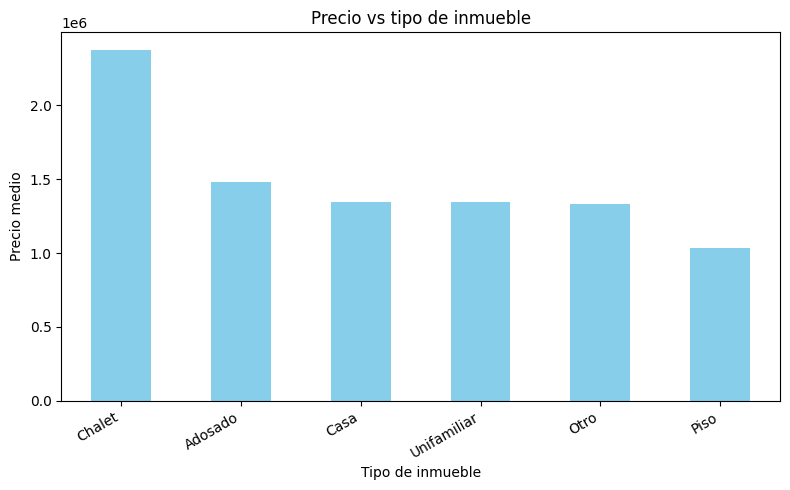

In [148]:
precio_medio_tipo = df.groupby('tipo_inmueble')['price_eur'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
precio_medio_tipo.plot(kind='bar', color='skyblue')
plt.title('Precio vs tipo de inmueble')
plt.xlabel('Tipo de inmueble')
plt.ylabel('Precio medio')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Esto de los barrios por el primer df que no los tenía y me ha dado toda la pereza rectificarlo 

In [150]:
#detectar barrios desde la descripción

def detectar_barrio(df):
    barrios = [
        "Palacio", "Embajadores", "Cortes", "Justicia", "Universidad", "Sol",
        "Recoletos", "Goya", "Lista", "Castellana", "Fuente del Berro", "Guindalera",
        "El Viso", "Prosperidad", "Ciudad Jardín", "Hispanoamérica", "Nueva España", "Castilla",
        "Almagro", "Trafalgar", "Arapiles", "Gaztambide", "Vallehermoso", "Ríos Rosas",
        "Ibiza", "Estrella", "Niño Jesús", "Pacífico", "Adelfas", "Jerónimos",
        "Cuatro Caminos", "Bellas Vistas", "Castillejos", "Berruguete", "Valdeacederas", "Almenara",
        "Atocha", "Delicias", "Palos de Moguer", "Legazpi", "Chopera", "Acacias", "Imperial",
        "Almendrales", "Moscardó", "Zofío", "Orcasitas", "Orcasur", "San Fermín",
        "Lucero", "Aluche", "Campamento", "Cuatro Vientos", "Los Cármenes", "Puerta del Ángel",
        "Opañel", "Vista Alegre", "San Isidro", "Puerta Bonita", "Buena Vista", "Abrantes"
    ]


    df["description_clean"] = df["description"].fillna("").astype(str).str.lower()

    def buscar_barrio(texto):
        for barrio in barrios:
            if barrio.lower() in texto:
                return barrio
        return "otro"

    df["barrio"] = df["description_clean"].apply(buscar_barrio)
    df.drop(columns=["description_clean"], inplace=True)

    return df

df = detectar_barrio(df)
df.head(0)


,url,property_native_id,price_eur,latitude,longitude,scrape_status,scraped_timestamp,description,energy_certificate_main_classification,energy_consumption_rating,energy_consumption_value,energy_emissions_rating,energy_emissions_value,Adaptado a personas con movilidad reducida,Agua,Aire acondicionado,Amueblado,Antigüedad,Armarios empotrados,Ascensor,Balcón,Baños,Calefacción,Calle alumbrada,Calle asfaltada,Carpintería exterior,Carpintería interior,Chimenea,Cocina equipada,Comedor,Conservación,Exterior,Garaje,Gas,Gastos de comunidad,Habitaciones,Interior,Jardín,Lavadero,Luz,No se aceptan mascotas,Orientación,Piscina,Planta,Portero automático,Puerta blindada,Referencia,Se aceptan mascotas,Sistema de seguridad,Soleado,Superficie construida,Superficie solar,Superficie útil,Teléfono,Terraza,Tipo de casa,Tipo suelo,Trastero,Urbanizado,Vidrios dobles,page_source,tipo_inmueble,barrio


precio medio por barrio, esta columna puede serle bastante útil al modelo

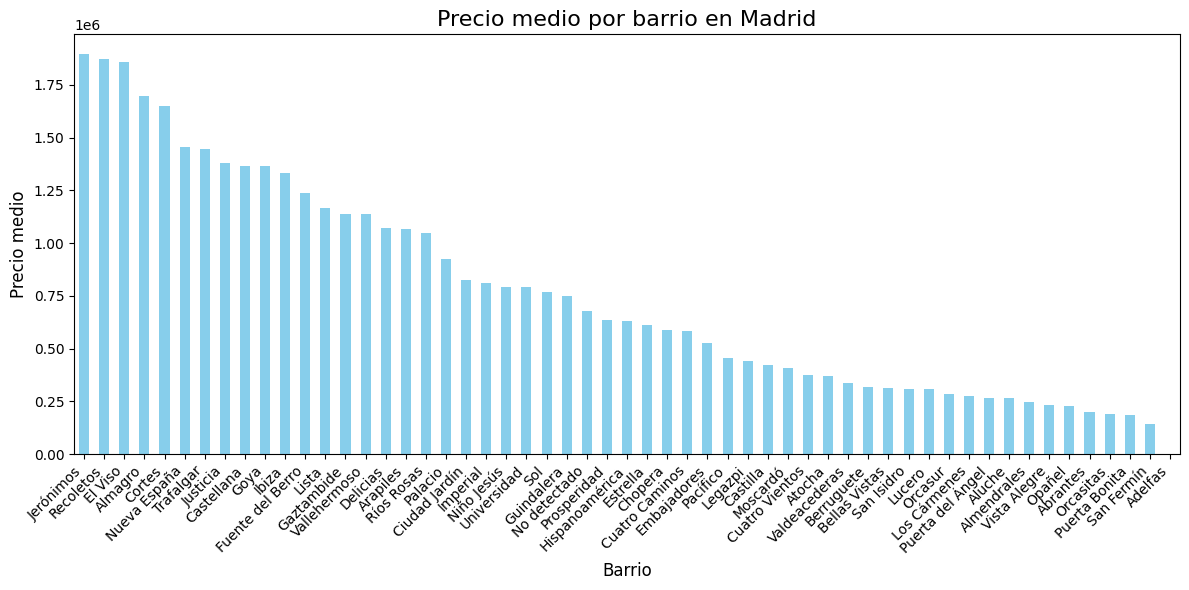

In [117]:
#gráfico del precio medio por barrio

precio_medio_por_barrio = df.groupby('barrio')['price_eur'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))

precio_medio_por_barrio.plot(kind='bar', color='skyblue')
plt.title('Precio medio por barrio en Madrid', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio medio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


En este gráfico vemos que el precio crece al crecer el número de habitaciones (bastante lógico, ya que más habitaciones suponen más metros cuadrados...habitualmente)

PD. Dmytri comentó que él hizo un modelo y que su matriz no daba importancia a esta columna tomaba como referencia el número de baños y los metros

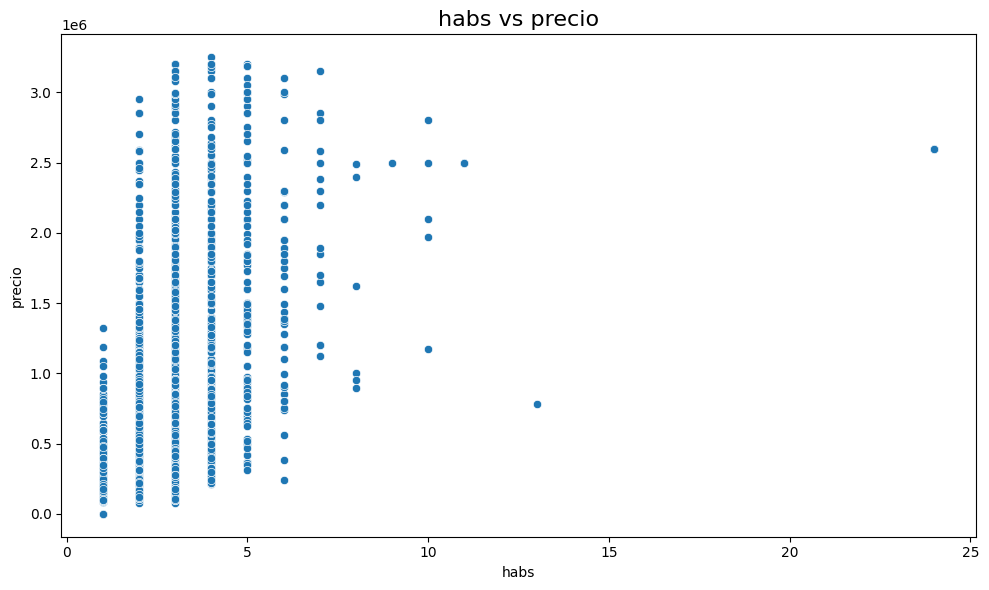

In [118]:
#relaión entre habitaciones y precio

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Habitaciones', y='price_eur')
plt.title('habs vs precio', fontsize=16)
plt.xlabel('habs')
plt.ylabel('precio')
plt.tight_layout()
plt.show()

He graficado la relación de inmuebles adaptados por barrio. En primer lugar está Sol y en segundo (omito el "otros") está Cortes. 
No lo he referenciado a precio porque al no coincidir con la relación de precio medio por barrio no me parece significativa para la predicción.
Asumiría que Sol y Cortes son barrios envejecidos, pero esto es más una apreciación anecdótica que útil.

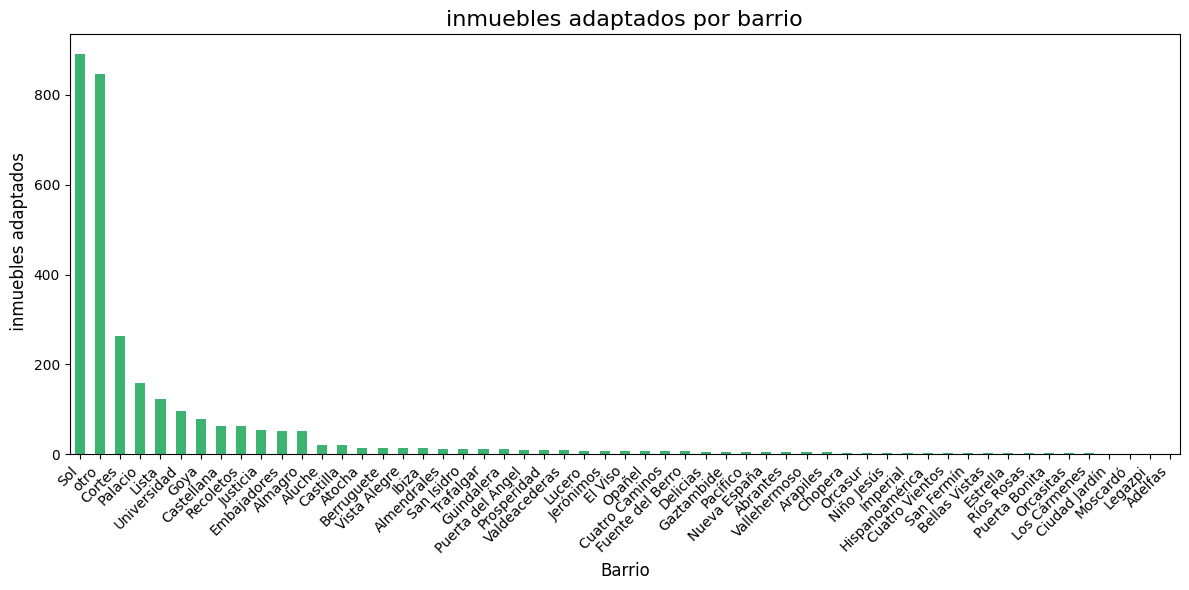

In [153]:
# Relación entre "Adaptado a personas con movilidad reducida" y "barrio"
adaptado_barrio = df.groupby(['barrio'])['Adaptado a personas con movilidad reducida'].apply(lambda x: x.notna().sum()).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
adaptado_barrio.plot(kind='bar', color='mediumseagreen')
plt.title('inmuebles adaptados por barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel(' inmuebles adaptados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [120]:
df["Adaptado a personas con movilidad reducida"].unique()

array([nan, True], dtype=object)

Sí hay una relación directa con el precio y si el edificio está adaptado. aunque en esta diferención no tenemos en cuenta el barrio

In [152]:
#DIferencia de precio entre pisos adaptados y no adaptados

df["Adaptado a personas con movilidad reducida"] = df["Adaptado a personas con movilidad reducida"].apply(
    lambda x: 1 if str(x).strip().lower() in ["sí", "si", "true", "1"] else 0
)

adaptado = df[df["Adaptado a personas con movilidad reducida"] == 1]["price_eur"]
no_adaptado = df[df["Adaptado a personas con movilidad reducida"] == 0]["price_eur"]

# Promedios
print("Precio medio (adaptado):    ", round(adaptado.mean(), 2))
print("Precio medio (no adaptado): ", round(no_adaptado.mean(), 2))

# Test t de diferencia de medias
from scipy.stats import ttest_ind
stat, p = ttest_ind(adaptado, no_adaptado, equal_var=False)
print(f"los inmuebles adaptados cuestan una media de : { round(adaptado.mean())-round(no_adaptado.mean())} más que los no adaptados")


Precio medio (adaptado):     1421532.79
Precio medio (no adaptado):  1152664.72
los inmuebles adaptados cuestan una media de : 268868 más que los no adaptados


En aire acondicionado, en amueblado, Balcón, Garaje no he realizado ninguna acción, sería interesante, una vez limpio ver los precios para alquiler. 

In [122]:
df["Aire acondicionado"].unique()

array([nan, 'True', 'Frío y calor', 'Frío', 'Individual',
       'Splits y unidades', 'A/a f/c', 'Comunitario', 'Aerotermia',
       'Frío-calor', 'Con bomba de calor', 'Centralizado',
       'A/a por conductos con sistema airzone', 'A/a f/c centralizado',
       'En toda la casa', 'De ventana', 'Por conductos independientes',
       'Por conductos'], dtype=object)

In [ ]:
df["Amueblado"].unique()

array(['True', nan, 'Si, con muebles de diseño',
       'Solo cocina y el mueble del salón',
       'Amueblado y equipado de lujo',
       'Amueblado para alquilar por habitaciones', 'Opcional', 'Vacío',
       'No', 'Reformado y amueblado de lujo', 'Si con muebles de diseño',
       'Solo cocina y baños', 'Se vende amueblado', 'Cocina',
       'Cocina amueblada', 'Todo el piso esta amueblado.',
       'Semi amueblado', 'Completamente amueblado', 'Solo la cocina',
       'También vacío', 'Con muy buenas calidades', 'Completo',
       'O sin mueble'], dtype=object)

In [ ]:
df["Balcón"].unique()

In [ ]:
 df["Garaje"].unique()

In [ ]:
df["Piscina"].unique()

In [ ]:
df["Luz"].unique()

In [ ]:
df["Puerta blindada"].unique()

La antiguedad la he mapeado en una cifra media de años para ver la relacion con el precio, parace que la columna no está muy relacionada

In [124]:
df["Antigüedad"].unique()
print(df['Antigüedad'].value_counts())

Antigüedad
Más de 50 años        1156
Entre 30 y 50 años     243
Entre 20 y 30 años     110
Entre 10 y 20 años      65
Menos de 5 años         25
Entre 5 y 10 años       11
Name: count, dtype: int64


In [125]:
mapa_antiguedad = {
    "Menos de 5 años": 3,
    "Entre 5 y 10 años": 7,
    "Entre 10 y 20 años": 15,
    "Entre 20 y 30 años": 25,
    "Entre 30 y 50 años": 40,
    "Más de 50 años": 60
}

df["antiguedad_valor"] = df["Antigüedad"].map(mapa_antiguedad)
print(df[["antiguedad_valor", "price_eur"]].corr())

                  antiguedad_valor  price_eur
antiguedad_valor          1.000000   0.006953
price_eur                 0.006953   1.000000


In [126]:
df["Ascensor"].unique()

array([nan, 'True', '2 ascensores', '2', 'Es bajo pero la finca tiene',
       'Recién instalado y pagado', 'Nuevo', '3 ascensores',
       '2 principal y de servicio', '4'], dtype=object)

En ascensor he pasado los datos a boleans y he repetido la accion que hiciera con pisos adaptados. 
Conclusión, los pisos con ascensos tienen un precio medio más alto. Esto puede ser por motivos distintos a la existencia del ascensor, pero hay una aparente correlación y debería tenerse en cuenta.

In [ ]:
#DIferencia de precio entre pisos con y sin ascensor
df["Ascensor"] = df["Ascensor"].apply(lambda x: 1 if pd.notna(x) else 0)

Ascensor = df[df["Ascensor"] == 1]["price_eur"]
no_Ascensor = df[df["Ascensor"] == 0]["price_eur"]

# Promedios
print("Precio medio (Ascensor):    ", round(Ascensor.mean(), 2))
print("Precio medio (no Ascensor): ", round(no_Ascensor.mean(), 2))

# Test de diferencia de medias
from scipy.stats import ttest_ind
stat, p = ttest_ind(adaptado, no_adaptado, equal_var=False)
print(f"los inmuebles con ascensor cuestan una media de : { round(Ascensor.mean())-round(no_Ascensor.mean())} más que los no ascensor")

Precio medio (Ascensor):     1030634.49
Precio medio (no Ascensor):  684179.74
los inmuebles con ascensor cuestan una media de : 346454 más que los no ascensor


Como he comentado antes, Dmytri comentó que su modelo valoraba el número de baños más que el de habitaciones.
He rescatado una función para rellenar los NaN de baños que tenía en un ejercicio anterior, asume mínimo uno por inmueble e imputa 1 baño cada 70 metros.
En el gráfico vemos que el precio de la propiedad crece en realción directa a número de baños (es lógico ya que también está directamente relacionado con los metros cuadrados del inmueble).


In [129]:
df["Baños"].unique()

array([ 2.,  1.,  5.,  4.,  3., nan, 17.,  7.,  8., 11.,  6., 10.,  9.])

In [ ]:
df['Superficie construida num'] = df['Superficie construida'].str.replace(' m²', '').astype(float)

# Función para rellenar baños si es NaN
def rellenar_banos(row):
    if pd.isna(row['Baños']):
        if not pd.isna(row['Superficie construida num']):
            return max(1, round(row['Superficie construida num'] / 70)) 
        else:
            return 1   # Al menos 1 baño
    else:
        return int(row['Baños'])

df['Baños'] = df.apply(rellenar_banos, axis=1)


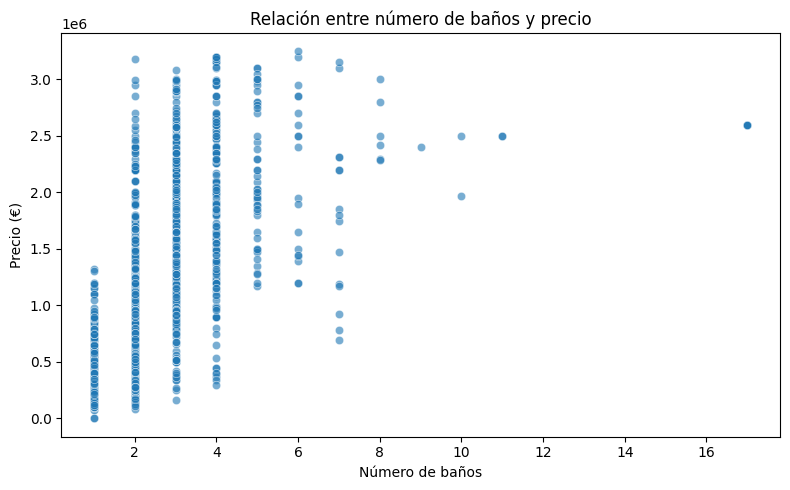

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Baños", y="price_eur", alpha=0.6)

plt.title("Relación entre número de baños y precio")
plt.xlabel("Número de baños")
plt.ylabel("Precio (€)")
plt.tight_layout()
plt.show()


En conservación los resultados son los esperados, los reformados y los a estrenar son más caros que los ue están en buen estado y a reformar

In [ ]:
 df["Conservación"].unique()

array(['En buen estado', nan, 'Reformado', 'A reformar', 'A estrenar'],
      dtype=object)

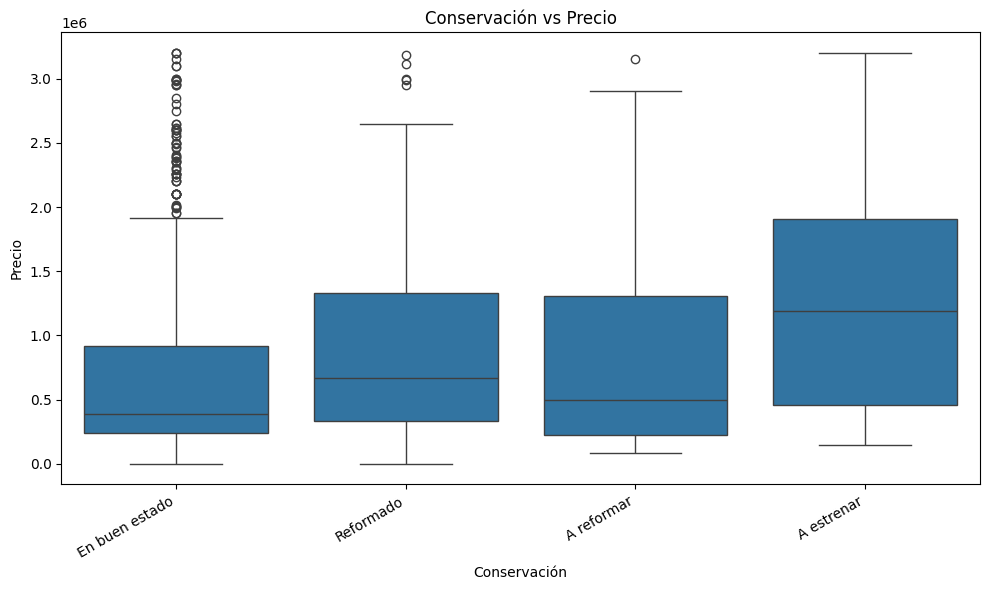

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conservación', y='price_eur')
plt.title('Conservación vs Precio')
plt.xlabel('Conservación')
plt.ylabel('Precio')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Para la planta he asignado el semisótano y entresuelo un -1 y un 0 a bajo y principal y he graficado en relación al preico.
La fluctuación de Boxplots en las plantas me hace pensar que no está muy relacionado con el precio en la compra-venta de pisos, esta relación será incluso menos acentuada en el alquiler.

In [137]:
df["Planta"].unique()

array(['2ª', nan, '3ª', '1ª', '5ª', '4ª', '6ª', 'Bajo', '7ª', '8ª', '10ª',
       'Semisótano', '9ª', '12ª', 'Entresuelo', 'Principal', '11ª',
       'Más de 20', '14ª', '16ª', '17ª'], dtype=object)

In [138]:
def normalizar_planta(Planta):
    if pd.isna(Planta):
        return Planta
    planta = str(Planta).strip().lower()
    if "semisótano" in planta or "entresuelo" in planta:
        return -1
    if "principal" in planta or "bajo" in planta:
        return 0
    if "más de 20" in planta:
        return 20
    planta = planta.replace("ª", "").replace("º", "")
    try:
        return int(planta)
    except ValueError:
        return Planta  

df["Planta_normalizada"] = df["Planta"].apply(normalizar_planta)
print(df["Planta_normalizada"].unique())


[ 2. nan  3.  1.  5.  4.  6.  0.  7.  8. 10. -1.  9. 12. 11. 20. 14. 16.
 17.]


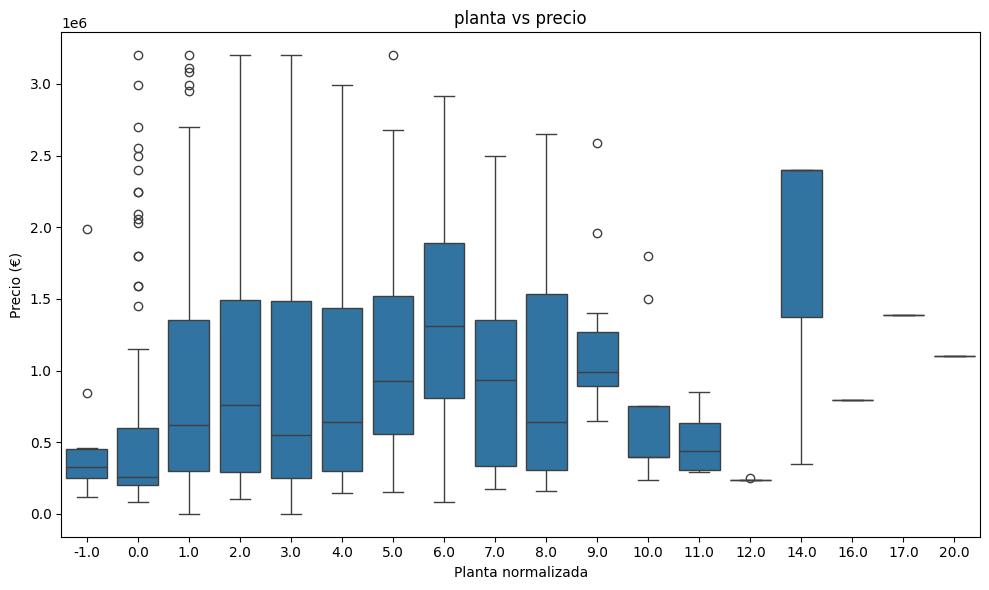

In [139]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Planta_normalizada', y='price_eur')
plt.title('planta vs precio')
plt.xlabel('Planta normalizada')
plt.ylabel('Precio (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La relación de supercifie construida no ha sido graficada por la obviedad de relación con el precio, pero la he usado para hacer una lista de precio medio del metro por barrios

In [141]:
df["Superficie construida"] = df["Superficie construida"].str.replace(' m²', '').astype(float)


In [142]:
# Calcular el precio medio por metro cuadrado por barrio
df_filtrado = df.dropna(subset=['barrio', 'Superficie construida', 'price_eur'])
df_filtrado = df_filtrado[df_filtrado['Superficie construida'] > 0]

df_filtrado['precio_m2'] = df_filtrado['price_eur'] / df_filtrado['Superficie construida']
precio_m2_barrio = df_filtrado.groupby('barrio')['precio_m2'].mean().sort_values(ascending=False)

print(precio_m2_barrio)

barrio
Palacio             15332.647140
Recoletos           13819.597943
Jerónimos           12500.038745
Trafalgar           11558.017584
Goya                11123.667764
Almagro             10743.813380
Ibiza               10080.564854
Justicia             9813.854364
Nueva España         9441.438893
Cortes               9294.511250
Arapiles             9160.839161
Lista                9125.898322
Vallehermoso         8595.341662
Castellana           8433.345096
Sol                  8071.169936
Gaztambide           8064.252779
El Viso              7775.615234
No detectado         7773.047674
Hispanoamérica       7578.091777
Niño Jesús           7334.619504
Estrella             7214.221014
Bellas Vistas        7156.827881
Ríos Rosas           7142.857143
Fuente del Berro     7012.043277
Delicias             6542.609222
Universidad          6210.772848
Guindalera           6056.561002
Imperial             5989.196476
Prosperidad          5960.731585
Cuatro Caminos       5928.709094
Emb

In [ ]:
El resto de columnas las considero prescindibles, bien sea por la dificultad de limpieza o por la poca relevancia que tienen para el análisis.